# **Bioinformatics - Computational Drug Discovery - Regression Models with Random Forest**

Vaibhav Ramakrishnan & Thi Cam Tu Le

We will be building a regression model of aromatase inhibitors using the random forest algorithm.



## **1. Import libraries**

In [3]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## **2. Load the data set**

In [4]:
df = pd.read_csv('aromatase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

## **3. Input features**
The ***Aromatase*** data set contains 881 input features and 1 output variable (pIC50 values).

### **3.1. Input features**

In [5]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2111,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2112,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2113,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2114,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### **3.2. Output features**

In [6]:
Y = df.pIC50
Y

0        5.148742
1        4.301030
2        6.623423
3        7.244125
4        7.267606
          ...    
2111    10.045757
2112     9.142668
2113     5.000000
2114     7.508638
2115     7.376751
Name: pIC50, Length: 2116, dtype: float64

### **3.3. Let's examine the data dimension**

In [7]:
X.shape

(2116, 881)

In [8]:
Y.shape

(2116,)

### **3.4. Remove low variance features**

In [9]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [10]:
X.shape

(2116, 160)

## **4. Data split (80/20 ratio)**

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [12]:
X_train.shape, Y_train.shape

((1692, 160), (1692,))

In [13]:
X_test.shape, Y_test.shape

((424, 160), (424,))

## **5. Building a Regression Model using Random Forest**

In [16]:
import numpy as np
np.random.seed(100)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.37711348050524895

In [17]:
Y_pred = model.predict(X_test)

In [18]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming you have already trained your model and made predictions
# Store the predictions in Y_pred

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, Y_pred)

# Calculate the Root Mean Square Error (RMSE)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 1.0802247291672724


## **6. Scatter Plot of Experimental vs Predicted pIC50 Values**

<function matplotlib.pyplot.show(close=None, block=None)>

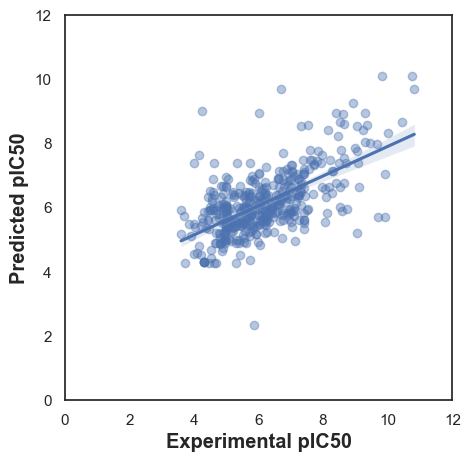

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show